In [1]:
%matplotlib inline
import os
from tomato.audio.AudioAnalyzer import AudioAnalyzer

In [2]:
# instantiate
audio_filepath = os.path.join('huzzam--sazsemaisi--aksaksemai----udi_nevres_bey',
                              'd2731692-626d-4a6d-9b67-a70c9e7b9745',
                              'd2731692-626d-4a6d-9b67-a70c9e7b9745.mp3')
makam = 'huzzam'
audioAnalyzer = AudioAnalyzer()

You can use the single line call "analyze," which does all the available analysis simultaneously

In [ ]:
# NOTE: This will take saveral minutes depending on the performance of your machine
features = audioAnalyzer.analyze(audio_filepath, makam=makam)

... or you can call all the methods individually

In [ ]:
# predominant melody extraction
pitch = audioAnalyzer.extract_pitch(audio_filepath)
# There is no need to run pitch filter, as it is run in extract_pitch 
# by default

# tonic identification
tonic = audioAnalyzer.identify_tonic(pitch)

# histogram computation
pitch_distribution = audioAnalyzer.compute_pitch_distribution(pitch, tonic)
pitch_class_distribution = pitch_distribution.to_pcd()

# transposition (ahenk) identification
ahenk = audioAnalyzer.identify_ahenk(tonic, makam)

# stable note extraction (tuning analysis)
stable_notes = audioAnalyzer.get_stable_notes(pitch_distribution, tonic, makam)


In [3]:
import json
pitch = json.load(open('tmp.json'))


# tonic identification
tonic = audioAnalyzer.identify_tonic(pitch)

# histogram computation
pitch_distribution = audioAnalyzer.compute_pitch_distribution(pitch, tonic)
pitch_class_distribution = pitch_distribution.to_pcd()

# transposition (ahenk) identification
ahenk = audioAnalyzer.identify_ahenk(tonic, makam)

# stable note extraction (tuning analysis)
stable_notes = audioAnalyzer.get_stable_notes(pitch_distribution, tonic, makam)


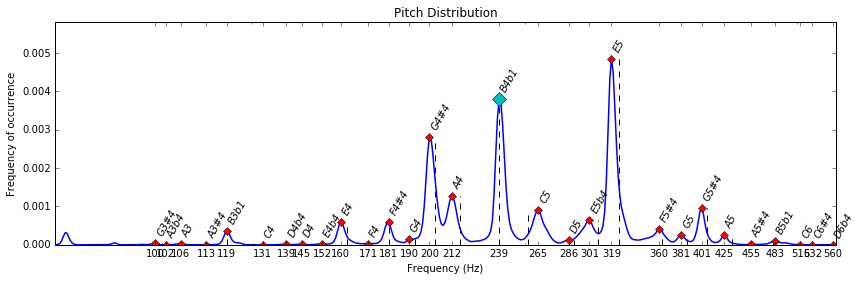

In [5]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (14, 4)
audioAnalyzer._noteModeler.plot(pitch_distribution, stable_notes)